In [258]:
from categorical import CategoricalVisualizer

In [259]:
import numpy as np
import pandas as pd
import plotly.express as px
from datetime import datetime

In [260]:
data_campaign = pd.read_csv('./data/raw/Campaign.csv')
data_customer = pd.read_csv('./data/raw/Customer.csv')
data_orderline = pd.read_csv('./data/raw/Orderline.csv')
data_orders = pd.read_csv('./data/raw/Orders.csv', encoding='latin-1')
data_product = pd.read_csv('./data/raw/Product.csv')
data_suspend_acct = pd.read_csv('./data/raw/suspend_acct.csv')

---

#  <center>**Data Profiling (Strategic)**</center>

---

### **Campaign**

In [261]:
data_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaignid        239 non-null    int64  
 1   campaignname      0 non-null      float64
 2   channel           239 non-null    object 
 3   discount          239 non-null    int64  
 4   freeshippingflag  239 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.5+ KB


In [262]:
data_campaign.isna().sum()

campaignid            0
campaignname        239
channel               0
discount              0
freeshippingflag      0
dtype: int64

In [263]:
data_campaign.duplicated().sum()

0

### **Customer**

In [264]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189559 entries, 0 to 189558
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customerid   189559 non-null  int64 
 1   householdid  189559 non-null  int64 
 2   gender       173355 non-null  object
 3   firstname    186644 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.8+ MB


In [265]:
data_customer.isna().sum()

customerid         0
householdid        0
gender         16204
firstname       2915
dtype: int64

In [266]:
data_customer.duplicated().sum()

0

### **Orderline**

In [267]:
data_orderline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286017 entries, 0 to 286016
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   orderlineid  286017 non-null  int64  
 1   orderid      286017 non-null  int64  
 2   productid    286017 non-null  int64  
 3   shipdate     286017 non-null  object 
 4   billdate     286017 non-null  object 
 5   unitprice    281033 non-null  float64
 6   numunits     286017 non-null  int64  
 7   totalprice   286017 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.5+ MB


In [268]:
data_orderline.isna().sum()

orderlineid       0
orderid           0
productid         0
shipdate          0
billdate          0
unitprice      4984
numunits          0
totalprice        0
dtype: int64

In [269]:
data_orderline.duplicated().sum()

0

### **Orders**

In [270]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192983 entries, 0 to 192982
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   orderid        192983 non-null  int64  
 1   customerid     192983 non-null  int64  
 2   campaignid     192983 non-null  int64  
 3   orderdate      192983 non-null  object 
 4   city           192964 non-null  object 
 5   state          191862 non-null  object 
 6   zipcode        192834 non-null  object 
 7   paymenttype    192983 non-null  object 
 8   totalprice     192983 non-null  float64
 9   numorderlines  192983 non-null  int64  
 10  numunits       192983 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 16.2+ MB


In [271]:
data_orders.isna().sum()

orderid             0
customerid          0
campaignid          0
orderdate           0
city               19
state            1121
zipcode           149
paymenttype         0
totalprice          0
numorderlines       0
numunits            0
dtype: int64

In [272]:
data_orders.duplicated().sum()

0

### **Product**

In [273]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUCTID         4040 non-null   int64  
 1   PRODUCTNAME       0 non-null      float64
 2   PRODUCTGROUPCODE  4040 non-null   object 
 3   PRODUCTGROUPNAME  4039 non-null   object 
 4   INSTOCKFLAG       4040 non-null   object 
 5   FULLPRICE         4040 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 189.5+ KB


In [274]:
data_product.isna().sum()

PRODUCTID              0
PRODUCTNAME         4040
PRODUCTGROUPCODE       0
PRODUCTGROUPNAME       1
INSTOCKFLAG            0
FULLPRICE              0
dtype: int64

In [275]:
data_product.duplicated().sum()

0

---

### **Strategic Profiling Summary**

- All column names joined together with no separator 
   - **Product**: all capitalized
- Some categorical variables have null values
- No duplicates across all tables
- One numerical variable has null values
   - **Orderline**: unitprice
- Date columns are in string format 
   - **Orderline**: shipdate, billdate
   - **Orders**: orderdate

### **Actions Required**

- Split all column names into parts joined by an underscore (_)
- De-capitalize all column names in the product table
- Impute all categorical null values with np.nan
- Impute all numerical null values with 0
- Convert all date columns into datetime format

---

# <center>**Data Cleansing** </center>

---

In [276]:
campaign = data_campaign.copy()
customer = data_customer.copy()
orderline = data_orderline.copy()
orders = data_orders.copy()
product = data_product.copy()
suspend_acct = data_suspend_acct.copy()

### **Campaign**

In [277]:
campaign.rename(columns={'campaignid': 'campaign_id', 'campaignname': 'campaign_name', 'freeshippingflag': 'free_shipping_flag'}, inplace=True)

In [278]:
campaign.fillna('None', inplace=True)

### **Customer**

In [279]:
customer.rename(columns={'customerid': 'customer_id', 'householdid': 'household_id', 'firstname': 'first_name'}, inplace=True)

In [280]:
customer.fillna('None', inplace=True)

### **Orderline**

In [281]:
orderline.columns = ['orderline_id', 'order_id', 'product_id', 'ship_date', 'bill_date', 'unit_price', 'n_units', 'total_price']

In [282]:
orderline.fillna(0, inplace=True)

In [283]:
orderline[['ship_date', 'bill_date']] = orderline[['ship_date', 'bill_date']].apply(pd.to_datetime)

### **Orders**

In [284]:
orders.columns = ['order_id', 'customer_id', 'campaign_id', 'order_date', 'city', 'state', 'zip_code', 'payment_type', 'total_price', 'n_orderlines', 'n_units']

In [285]:
orders.fillna('None', inplace=True)

In [286]:
orders[['order_date']] = orders[['order_date']].apply(pd.to_datetime)

### **Product**

In [287]:
product.columns = ['product_id', 'product_name', 'product_group_code', 'product_group_name', 'in_stock_flag', 'full_price']

In [288]:
product.fillna('None', inplace=True)

---

# <center>**Data Profiling (Tactic)**</center>

---

## **Expectation**

- ### **Entity Relationship**

   - Campaign <-- 1:n --> Orders
   - Customer <-- 1:n --> Orders
   - Orders <-- 1:n --> Orderline
   - Product <-- 1:n --> Orderline

- ### **Business Logic**

   ***Orderline***
   - An orderline should not be billed until the product is shipped
      - Shipping date at most as late as the billing date 
      - (Number of units placed) x (Unit price) = (total price)

   ***Orders & Orderline***
   - Each order consists of a list of orderlines with
      - Product unit price
      - Number of units placed
   - For each order with its orderlines, the following should be observed:
      1. (Number of units) = (Total number of units placed across its orderlines)
      2. (Total price) = (Sum of the total prices across its orderlines)
      3. (Number of orderlines) = (Total number of lines irrespective of the number of units) 
      4. Order date at most as late as the shipping date/billing date

   ***Product***
   - Product group name and Product group code have one-to-one relationship

---

## <center>**Entity Relationship Validation**</center>

---

In [289]:
def one_to_many(entity_1: str, entity_2: str, df: pd.DataFrame) -> bool:
   """Check if <col1> and <col2> satisfy a one-to-many relationship
   in <df>.
   """
   col_1, col_2 = entity_1 + '_id', entity_2 + '_id'
   return np.sum(df.groupby([col_2, col_1]).size() > 1) == 0

In [290]:
def no_foreign_key_violation(key_entity: str, df_1: pd.DataFrame, df_2: pd.DataFrame) -> bool:
   """<key_entity> is a primary key in <df_1> and a foreign key in <df_2> pointing to that
   in <df_1>. Check if <key_entity> in <df_2> contains any entries that are not in <df_1>.
   """
   col = key_entity + '_id'
   pkey_set = set(df_1[col].unique())
   fkey_set = set(df_2[col].unique())
   return fkey_set.difference(pkey_set) == set()

**Do campaign and orders satisfy one-to-many relationship?**

In [291]:
one_to_many('campaign', 'order', orders)

True

In [292]:
no_foreign_key_violation('campaign', campaign, orders)

True

**Do customer and orders satisfy one-to-many relationship?**

In [293]:
one_to_many('customer', 'order', orders)

True

In [294]:
no_foreign_key_violation('customer', customer, orders)

False

**Do orders and orderline satisfy one-to-many relationship?**

In [295]:
one_to_many('orderline', 'order', orderline)

True

In [296]:
no_foreign_key_violation('order', orders, orderline)

True

**Do product and orderline satisfy one-to-many relationship?**

In [297]:
one_to_many('orderline', 'product', orderline)

True

In [298]:
no_foreign_key_violation('product', product, orderline)

True

---

**Violation**: Customer <-- 1:n --> Orders

**There are orders placed under customers who aren't found in the customer table**

---

In [299]:
unknown_customer_ids = list(set(orders.customer_id.unique()).difference(customer.customer_id.unique()))

In [300]:
unknown_customer_ids

[0]

In [301]:
sketchy_orders = orders.loc[orders['customer_id'] == 0, :]

In [302]:
sketchy_orders.shape

(3424, 11)

In [303]:
sketchy_orders.head()

,order_id,customer_id,campaign_id,order_date,city,state,zip_code,payment_type,total_price,n_orderlines,n_units
148,1016925,0,2003,2011-02-13,1000 LOUSANNE 8,None,SWITZ,DB,13.00,1,1
379,1323277,0,2005,2015-06-18,MONTREAL,PQ,H3B3C,DB,27.95,3,3
380,1327146,0,2005,2015-06-18,MONTREAL,PQ,H3B3C,DB,195.00,1,1
381,1327191,0,2005,2015-06-16,AVON,MN,56310,VI,195.00,1,1
382,1328128,0,2005,2015-06-23,DEDHAM,MA,02026,VI,33.95,1,1


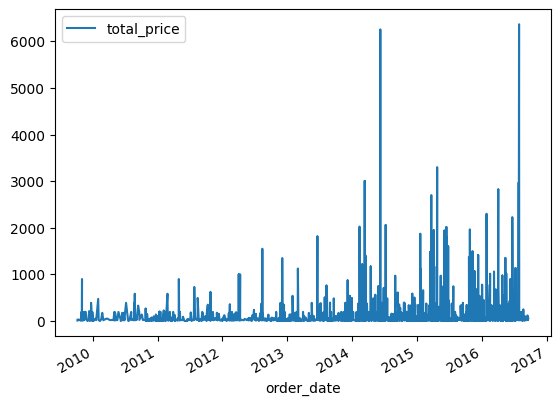

In [304]:
sketchy_orders.plot.line(x='order_date', y='total_price');

**Customer with id=0 made 3424 orders with many over $1,000 dollars**

**This customer is highly suspicious, let's separate him/her from the population for further examination**

---

In [305]:
orders = orders.loc[orders['customer_id'] != 0, :]

---

In [306]:
data_orders.shape[0] - sketchy_orders.shape[0] == orders.shape[0]

True

**Let's re-check the foreign key relationship between customer and orders**

In [307]:
no_foreign_key_violation('customer', customer, orders)

True

---

**Orders table split into two groups**:
1. orders 
   - customer_id != 0
   - n = 189599
2. sketchy_orders 
   - customer_id = 0
   - n = 3424

---

**Re-check the foreign key relationship in tables where order_id is the foreign key pointing to that in the now updated orders table**

In [308]:
no_foreign_key_violation('order', orders, orderline)

False

**These order_id in the orderline table violating the relationship should be exactly those from customer with customer_id = 0** 

In [309]:
violated_orderline_order_ids = set(orderline.order_id.unique()).difference(orders.order_id.unique())

In [310]:
violated_orderline_order_ids == set(sketchy_orders.order_id.unique())

True

**As expected!**

**Let's separate these orderlines as we did the orders from customer with customer_id=0, and save them for later examination** 

In [311]:
sketchy_orderlines = orderline[orderline['order_id'].isin(list(violated_orderline_order_ids))]

In [312]:
sketchy_orderlines.shape[0]

5164

---

In [313]:
orderline = orderline[~orderline['order_id'].isin(list(violated_orderline_order_ids))]

---

In [314]:
data_orderline.shape[0] == orderline.shape[0] + sketchy_orderlines.shape[0]

True

**Let's re-check the foreign key relationship between orders and orderline**

In [315]:
no_foreign_key_violation('order', orders, orderline)

True

---

**Orderline table split into two groups**
1. orderline 
   - order_id not in sketchy_orders.order_id
   - n = 280853
2. sketchy_orderlines
   - order_id in sketchy_orders.order_id
   - n = 5164

---

## <center>**Business Logic Validation**</center>

---

### **Orderline**

- ship_date <= bill_date
- unit_price * n_units = total_price

---

### **1. Do all shipping dates precede their corresponding billing date?**

In [316]:
np.sum(orderline['ship_date'] <= orderline['bill_date']) == orderline.shape[0]

False

In [317]:
shipping_after_billing_orderlines = orderline[orderline['ship_date'] > orderline['bill_date']]

In [318]:
shipping_after_billing_orderlines.head()

,orderline_id,order_id,product_id,ship_date,bill_date,unit_price,n_units,total_price
151,1061031,1053156,10001,2012-11-12,2012-11-10,13.5,1,13.5
157,1064224,1053617,10001,2012-11-19,2012-11-18,15.0,1,15.0
183,1072837,1058290,10001,2012-12-10,2012-12-09,15.0,1,15.0
221,1081999,1067950,10001,2012-12-17,2012-12-16,15.0,1,15.0
226,1089058,1070380,10001,2012-12-26,2012-12-25,13.5,2,27.0


In [319]:
shipping_after_billing_orderlines.shape[0]

5666

**There are 5666 orderlines that were billed before the products were shipped**

In [320]:
shipping_after_billing_orderlines.order_id.nunique()

4042

**There are 4042 orders that were billed before the products were shipped**

---

### **2. Are all the products of unit price and number of units equal to total price?**

In [321]:
np.sum(np.isclose(orderline['unit_price'] * orderline['n_units'], orderline['total_price'])) == orderline.shape[0]

True

---

### **Orders & Orderline**

- orders.n_orderlines = count(orderline.n_units) 
- orders.n_units = sum(orderline.n_units) 
- orders.total_price = sum(orderline.total_price) 
- orders.order_date <= orderline.ship_date 

---

In [322]:
orderlines_by_order = orderline.groupby('order_id',as_index=False)

### **1. Is the number of orderlines in an order the same as the total number of lines under that order?**

In [323]:
order_total_lines = orderlines_by_order.size()[['order_id', 'size']]

In [324]:
order_n_orderlines = pd.merge(orders, order_total_lines, on='order_id')

In [325]:
order_n_orderlines.head()

,order_id,customer_id,campaign_id,order_date,city,state,zip_code,payment_type,total_price,n_orderlines,n_units,size
0,1285010,139202,2001,2015-04-15,CORONA,NY,11368,AE,7.95,1,1,1
1,1285012,139560,2001,2015-04-15,NEW YORK,NY,10002,MC,7.95,1,1,1
2,1287014,169727,2001,2015-04-16,WHITE PLAINS,NY,10606,MC,7.95,1,1,1
3,1289042,139353,2001,2015-04-19,WHITE PLAINS,NY,10604,AE,7.95,1,1,1
4,1290056,134252,2001,2015-04-22,NEW YORK,NY,10023,MC,7.95,1,1,1


In [326]:
np.sum(order_n_orderlines['n_orderlines'] == order_n_orderlines['size']) == order_n_orderlines.shape[0]

True

### **2. Is the number of units in an order the same as the total number of units across its orderlines?**

In [327]:
order_total_units = orderlines_by_order.sum('n_units')[['order_id', 'n_units']]

In [328]:
order_n_units = pd.merge(orders, order_total_units, on='order_id')

In [329]:
order_n_units.head()

,order_id,customer_id,campaign_id,order_date,city,state,zip_code,payment_type,total_price,n_orderlines,n_units_x,n_units_y
0,1285010,139202,2001,2015-04-15,CORONA,NY,11368,AE,7.95,1,1,1
1,1285012,139560,2001,2015-04-15,NEW YORK,NY,10002,MC,7.95,1,1,1
2,1287014,169727,2001,2015-04-16,WHITE PLAINS,NY,10606,MC,7.95,1,1,1
3,1289042,139353,2001,2015-04-19,WHITE PLAINS,NY,10604,AE,7.95,1,1,1
4,1290056,134252,2001,2015-04-22,NEW YORK,NY,10023,MC,7.95,1,1,1


In [330]:
np.sum(np.isclose(order_n_units['n_units_x'], order_n_units['n_units_y'])) == order_n_units.shape[0]

True

### **3. Is the total price of an order the same as the sum of the total prices of its orderlines**

In [331]:
order_total_prices = orderlines_by_order.sum('total_price')[['order_id', 'total_price']]

In [332]:
order_total_price = pd.merge(orders, order_total_prices, on='order_id')

In [333]:
order_total_price.head()

,order_id,customer_id,campaign_id,order_date,city,state,zip_code,payment_type,total_price_x,n_orderlines,n_units,total_price_y
0,1285010,139202,2001,2015-04-15,CORONA,NY,11368,AE,7.95,1,1,7.95
1,1285012,139560,2001,2015-04-15,NEW YORK,NY,10002,MC,7.95,1,1,7.95
2,1287014,169727,2001,2015-04-16,WHITE PLAINS,NY,10606,MC,7.95,1,1,7.95
3,1289042,139353,2001,2015-04-19,WHITE PLAINS,NY,10604,AE,7.95,1,1,7.95
4,1290056,134252,2001,2015-04-22,NEW YORK,NY,10023,MC,7.95,1,1,7.95


In [334]:
np.sum(np.isclose(order_total_price['total_price_x'], order_total_price['total_price_y'])) == order_total_price.shape[0]

True

### **4. Is the order date of an order at most as late as the earliest shipping date of its orderlines, which is also at most as late as its billing date?**

In [335]:
order_ship_bill_dates = pd.merge(orders, orderline, on='order_id')[['order_id', 'orderline_id', 'order_date', 'ship_date', 'bill_date']]

In [336]:
order_ship_bill = pd.Series([(row['order_date'] <= row['ship_date']) and (row['ship_date'] <= row['bill_date']) and (row['order_date'] <= row['bill_date']) for i, row in order_ship_bill_dates.iterrows()])

In [337]:
np.sum(order_ship_bill) == order_ship_bill_dates.shape[0]

False

In [338]:
not_order_ship_bill_orderlines = order_ship_bill_dates[~order_ship_bill]

In [339]:
not_order_ship_bill_orderlines.head()

,order_id,orderline_id,order_date,ship_date,bill_date
173,1081015,1100353,2013-01-25,2013-02-04,2013-02-03
174,1081015,1100320,2013-01-25,2013-02-04,2013-02-03
180,1081523,1100493,2013-01-26,2013-02-04,2013-02-03
181,1081523,1100516,2013-01-26,2013-02-04,2013-02-03
197,1082066,1100594,2013-01-27,2013-02-04,2013-02-03


In [340]:
not_order_ship_bill_orderlines.shape[0]

5710

In [341]:
not_order_ship_bill_orderlines.order_id.nunique()

4067

In [342]:
not_order_ship_bill_orderlines[not_order_ship_bill_orderlines['bill_date'] < not_order_ship_bill_orderlines['order_date']].order_id.nunique()

0

In [343]:
not_order_ship_bill_orderlines[not_order_ship_bill_orderlines['ship_date'] < not_order_ship_bill_orderlines['order_date']].order_id.nunique()

25

---

**There are 5710 orderlines (4067 orders) that were either shipped before ordered or not billed before shipped**
- order < bill < ship
   - orderlines: 5666
   - orders: 4042
- ship < order < bill
   - orderlines: 44
   - orders: 25

---

**A product couldn't have been shipped before the order was even placed. Remove orders and orderlines where shipping date precedes the order date**

In [344]:
shipped_before_ordered = not_order_ship_bill_orderlines[not_order_ship_bill_orderlines['ship_date'] < not_order_ship_bill_orderlines['order_date']]

---

In [345]:
orders = orders.loc[~orders['order_id'].isin(shipped_before_ordered['order_id']), :]

In [346]:
orderline = orderline.loc[~orderline['order_id'].isin(shipped_before_ordered['order_id']), :]

---

**Re-check the foreign key relationship between orders and orderline**

In [347]:
no_foreign_key_violation('order', orders, orderline)

True

---

### **Product**

- Product group name <-- 1:1 --> Product group code

---

In [348]:
visualizer = CategoricalVisualizer()

In [349]:
visualizer.read_data(product)

In [350]:
visualizer.get_visualizations('product_group_name')

In [351]:
visualizer.get_visualizations('product_group_code')

---

**Program group code and program group name do satsify one-to-one relationship**

---

# <center>**Export Clean Datasets to CSV**</center>

In [352]:
campaign.to_csv('./data/clean/campaign.csv', index=False, )
customer.to_csv('./data/clean/customer.csv', index=False)
orderline.to_csv('./data/clean/orderline.csv', index=False)
orders.to_csv('./data/clean/orders.csv', index=False)
product.to_csv('./data/clean/product.csv', index=False)
sketchy_orders.to_csv('./data/clean/sketchy_orders.csv', index=False)
sketchy_orderlines.to_csv('./data/clean/sketchy_orderline.csv', index=False)